In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [70]:
DATASET_PATH = 'dataset_AudioMNIST'
#DATASET_PATH_KINKU = '/data/kinku'
DATASET_PATH_SPEECH = 'data/speech_commands_dataset'
#DATASET_PATH_VAL = 'data/dataset_AudioMNIST_val'
DATASET_PATH_TEST = 'data/dataset_test_4c_eng'
data_dir = pathlib.Path(DATASET_PATH)
#data_dir_kinku = pathlib.Path(DATASET_PATH_KINKU)
data_dir_speech = pathlib.Path(DATASET_PATH_SPEECH)
#data_dir_val = pathlib.Path(DATASET_PATH_VAL)
data_dir_test = pathlib.Path(DATASET_PATH_TEST)

In [13]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
commands = commands[commands != '.DS_Store']
print('Commands:', commands)

%store commands

Commands: ['eight' 'nine' 'three' 'one' 'zero' 'seven' 'two' 'six' 'five' 'four']
Stored 'commands' (ndarray)


In [71]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
# + tf.io.gfile.glob(str(data_dir_speech) + '/*/*') 
#  + tf.io.gfile.glob(str(data_dir_kinku) + '/*') 
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)

print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
print('Example file tensor:', filenames[0])
print(filenames)


Number of total examples: 15500
Number of examples per label: 1550
Example file tensor: tf.Tensor(b'dataset_AudioMNIST/one/1_33_5.wav', shape=(), dtype=string)
tf.Tensor(
[b'dataset_AudioMNIST/one/1_33_5.wav'
 b'dataset_AudioMNIST/five/5_22_49.wav'
 b'dataset_AudioMNIST/six/6_03_28.wav' ...
 b'dataset_AudioMNIST/seven/7_01_23.wav'
 b'dataset_AudioMNIST/six/6_31_46.wav'
 b'dataset_AudioMNIST/three/3_05_21.wav'], shape=(15500,), dtype=string)


In [15]:
filenames_speech = tf.io.gfile.glob(str(data_dir_speech) + '/*/*') 
filenames_speech = tf.random.shuffle(filenames_speech)
num_samples = len(filenames_speech)
print('Number of total examples:', num_samples)
print("Number of examples per label:")
for number in commands:
#     print(number, len(tf.io.gfile.listdir(str(data_dir_speech/number))))
    print(f"{number}:{len(tf.io.gfile.listdir(str(data_dir_speech/number)))}")
print('Example file tensor:', filenames_speech[0])
print(filenames_speech)

Number of total examples: 38908
Number of examples per label:
eight:3787
nine:3934
three:3727
one:3890
zero:4052
seven:3998
two:3880
six:3860
five:4052
four:3728
Example file tensor: tf.Tensor(b'data/speech_commands_dataset/three/cf87b736_nohash_0.wav', shape=(), dtype=string)
tf.Tensor(
[b'data/speech_commands_dataset/three/cf87b736_nohash_0.wav'
 b'data/speech_commands_dataset/eight/4bb1244f_nohash_0.wav'
 b'data/speech_commands_dataset/three/60472d26_nohash_0.wav' ...
 b'data/speech_commands_dataset/six/e3e0f145_nohash_0.wav'
 b'data/speech_commands_dataset/six/5fadb538_nohash_0.wav'
 b'data/speech_commands_dataset/one/679463fc_nohash_1.wav'], shape=(38908,), dtype=string)


In [16]:
filenames_1 = tf.io.gfile.glob(str(data_dir) + '/*/*') + tf.io.gfile.glob(str(data_dir_speech) + '/*/*') 
filenames_1 = tf.random.shuffle(filenames_1)
num_samples = len(filenames_1)

print('Number of total examples of audio mmist + speech commands dataset :', num_samples)

Number of total examples of audio mmist + speech commands dataset : 54408


In [19]:
filenames_2 = tf.io.gfile.glob(str(data_dir) + '/*/*')+ tf.io.gfile.glob(str(data_dir_speech) + '/*/*')
filenames_2 = tf.random.shuffle(filenames_2)
num_samples = len(filenames_2)

print('Number of total examples of  Audio mnist + speech commands dataset:', num_samples)

Number of total examples of  Audio mnist + speech commands dataset: 54408


In [73]:
filenames_test = tf.io.gfile.glob(str(data_dir_test) + '/*/*')
filenames_test = tf.random.shuffle(filenames_test)
num_samples_test = len(filenames_test)

print('Number of total examples:', num_samples_test)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir_test/commands[0]))))
print('Example file tensor:', filenames_test[0])

print(filenames_test)

Number of total examples: 145
Number of examples per label: 12
Example file tensor: tf.Tensor(b'data/dataset_test_4c_eng/eight/8_eng9.wav', shape=(), dtype=string)
tf.Tensor(
[b'data/dataset_test_4c_eng/eight/8_eng9.wav'
 b'data/dataset_test_4c_eng/three/3_eng8.wav'
 b'data/dataset_test_4c_eng/one/1_eng4.wav'
 b'data/dataset_test_4c_eng/nine/9_eng15.wav'
 b'data/dataset_test_4c_eng/six/6_eng1.wav'
 b'data/dataset_test_4c_eng/four/4_eng3.wav'
 b'data/dataset_test_4c_eng/seven/7_eng6.wav'
 b'data/dataset_test_4c_eng/four/4_eng13.wav'
 b'data/dataset_test_4c_eng/four/4_eng11.wav'
 b'data/dataset_test_4c_eng/one/1_eng10.wav'
 b'data/dataset_test_4c_eng/nine/9_eng16.wav'
 b'data/dataset_test_4c_eng/eight/8_eng14.wav'
 b'data/dataset_test_4c_eng/seven/7_eng14.wav'
 b'data/dataset_test_4c_eng/six/6_eng9.wav'
 b'data/dataset_test_4c_eng/three/3_eng1.wav'
 b'data/dataset_test_4c_eng/eight/8_eng10.wav'
 b'data/dataset_test_4c_eng/five/5_eng14.wav'
 b'data/dataset_test_4c_eng/four/4_eng2.wav'
 b'

In [74]:
train_files = filenames_1
train_files_2 = filenames_2
#val_files = filenames_val[2700: 2700 + 300]
#val_files = filenames_val[: 500]
test_files = filenames_test[:145]

print('Training_1 set size', len(train_files))
print('Training_2 set size', len(train_files_2))
#print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training_1 set size 54408
Training_2 set size 54408
Test set size 145


In [75]:
test_file = tf.io.read_file(DATASET_PATH+'/three/3_01_5.wav')
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

TensorShape([29975, 1])

In [27]:
def decode_audio(audio_binary):
  # Decode WAV-encoded audio files to `float32` tensors, normalized
  # to the [-1.0, 1.0] range. Return `float32` audio and a sample rate.
  audio, _ = tf.audio.decode_wav(contents=audio_binary)
  # Since all the data is single channel (mono), drop the `channels`
  # axis from the array.
  return tf.squeeze(audio, axis=-1)

In [28]:
def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep)
  # Note: You'll use indexing here instead of tuple unpacking to enable this
  # to work in a TensorFlow graph.
  return parts[-2]

In [29]:
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

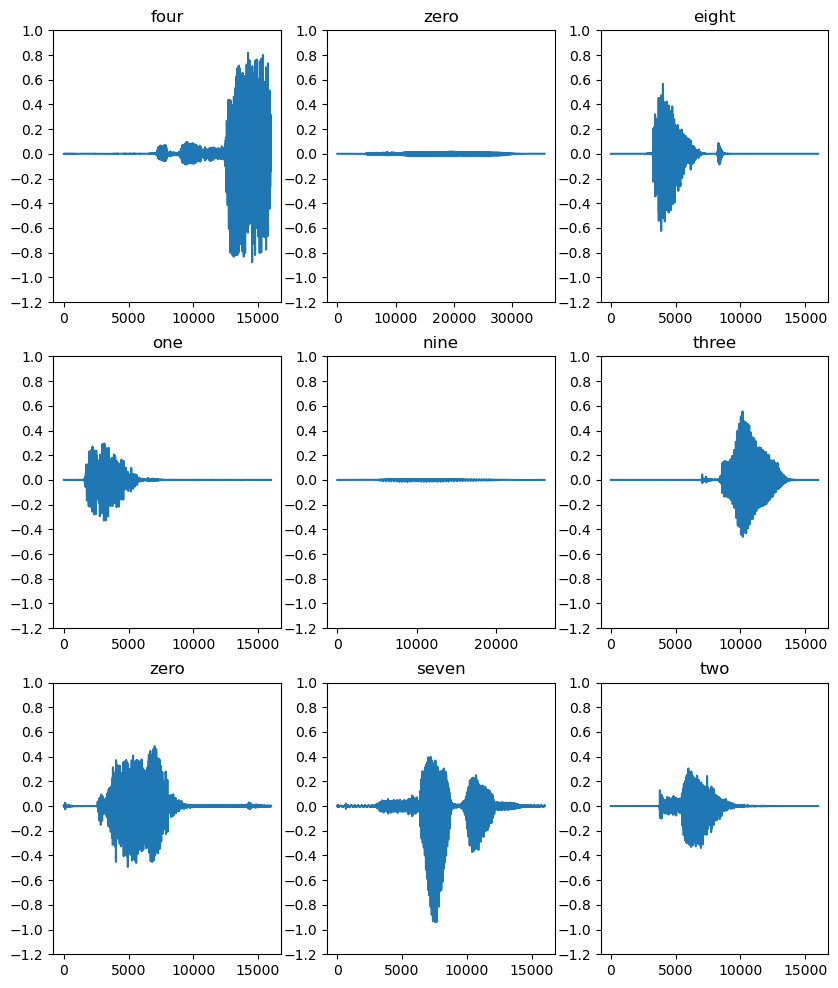

In [31]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

In [32]:
def get_spectrogram(waveform):
  # Zero-padding for an audio waveform with less than 16,000 samples.
  input_len = 16000
  waveform = waveform[:input_len]
  zero_padding = tf.zeros(
      [16000] - tf.shape(waveform),
      dtype=tf.float32)
  # Cast the waveform tensors' dtype to float32.
  waveform = tf.cast(waveform, dtype=tf.float32)
  # Concatenate the waveform with `zero_padding`, which ensures all audio
  # clips are of the same length.
  equal_length = tf.concat([waveform, zero_padding], 0)
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [34]:
for waveform, label in waveform_ds.take(1):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(waveform, rate=16000))

Label: four
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [59]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

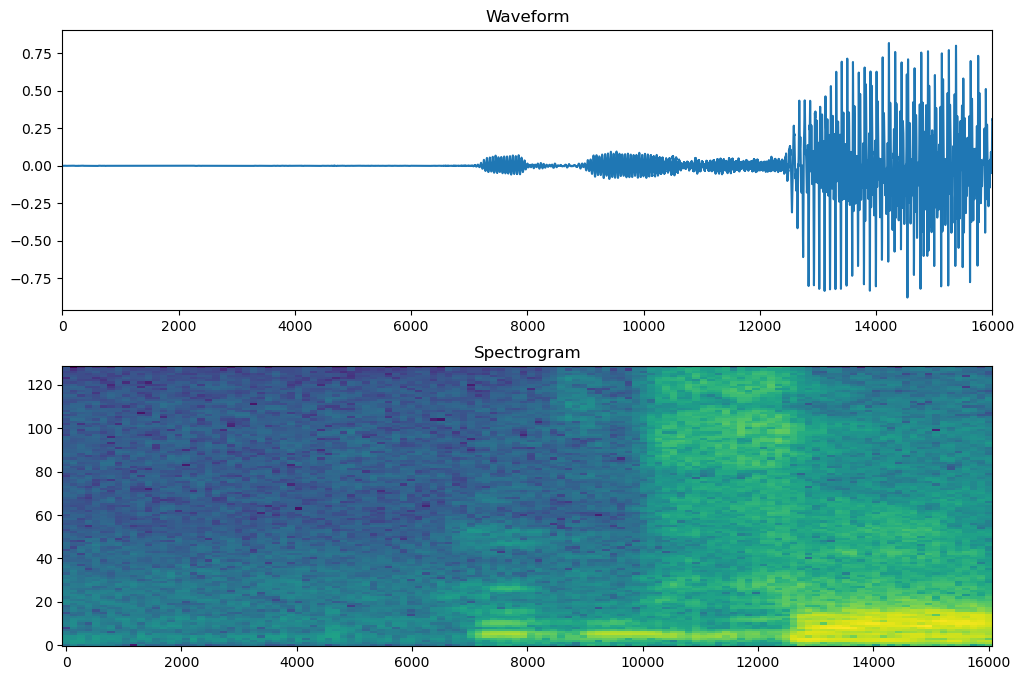

In [60]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [61]:
def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  label_id = tf.argmax(label == commands)
  return spectrogram, label_id

In [62]:
spectrogram_ds = waveform_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

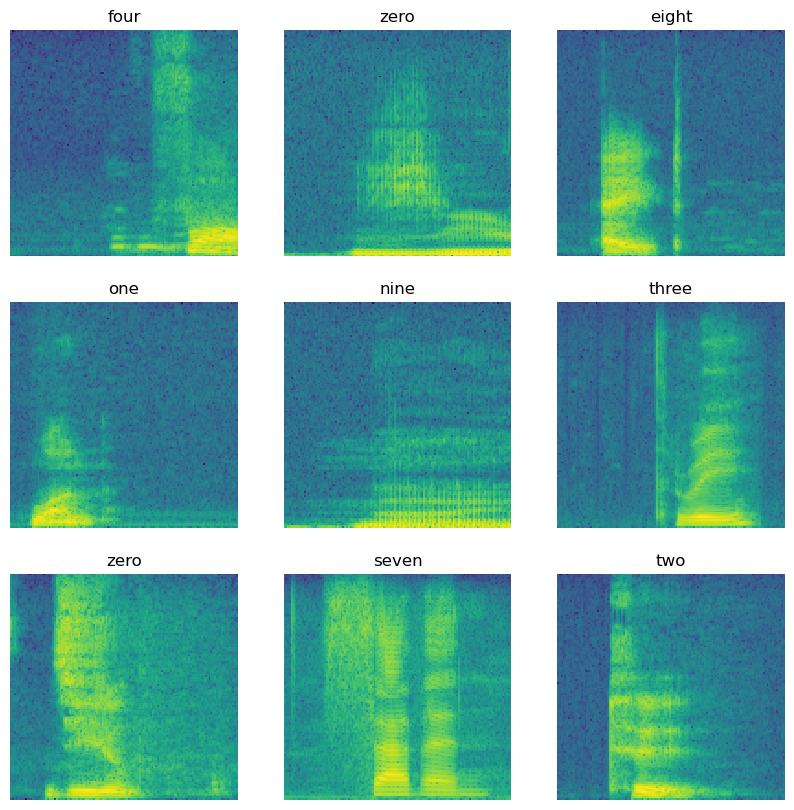

In [63]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(commands[label_id.numpy()])
  ax.axis('off')

plt.show()

In [64]:
def preprocess_dataset(files):
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  output_ds = files_ds.map(
      map_func=get_waveform_and_label,
      num_parallel_calls=AUTOTUNE)
  output_ds = output_ds.map(
      map_func=get_spectrogram_and_label_id,
      num_parallel_calls=AUTOTUNE)
  return output_ds

In [76]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(train_files)
test_ds = preprocess_dataset(test_files)

In [80]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [81]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [82]:
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(commands)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_3 (Normaliza  (None, 32, 32, 1)         3         
 tion)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)       

In [83]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

## Train data 1

In [84]:
EPOCHS = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/100
851/851 [==============================] - 134s 157ms/step - loss: 1.1927 - accuracy: 0.5936 - val_loss: 0.5509 - val_accuracy: 0.8420
Epoch 2/100
851/851 [==============================] - 106s 125ms/step - loss: 0.6044 - accuracy: 0.8006 - val_loss: 0.3563 - val_accuracy: 0.8930
Epoch 3/100
851/851 [==============================] - 104s 122ms/step - loss: 0.4606 - accuracy: 0.8458 - val_loss: 0.2457 - val_accuracy: 0.9247
Epoch 4/100
851/851 [==============================] - 100s 118ms/step - loss: 0.3852 - accuracy: 0.8731 - val_loss: 0.2059 - val_accuracy: 0.9359
Epoch 5/100
851/851 [==============================] - 96s 113ms/step - loss: 0.3278 - accuracy: 0.8914 - val_loss: 0.1636 - val_accuracy: 0.9490
Epoch 6/100
851/851 [==============================] - 98s 115ms/step - loss: 0.2912 - accuracy: 0.9028 - val_loss: 0.1483 - val_accuracy: 0.9549
Epoch 7/100
851/851 [==============================] - 97s 114ms/step - loss: 0.2676 - accuracy: 0.9102 - val_loss: 0.11

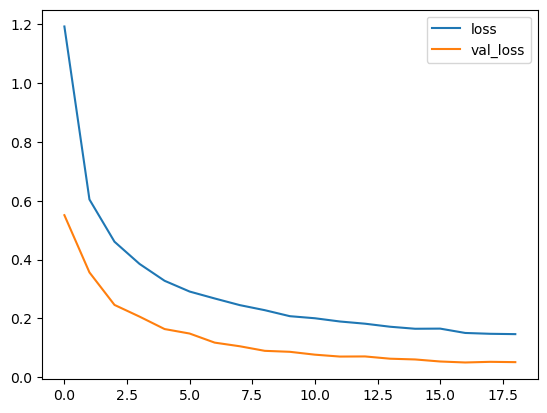

In [85]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [86]:
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [87]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

5/5 [==============================] - 0s 9ms/step
Test set accuracy: 84%


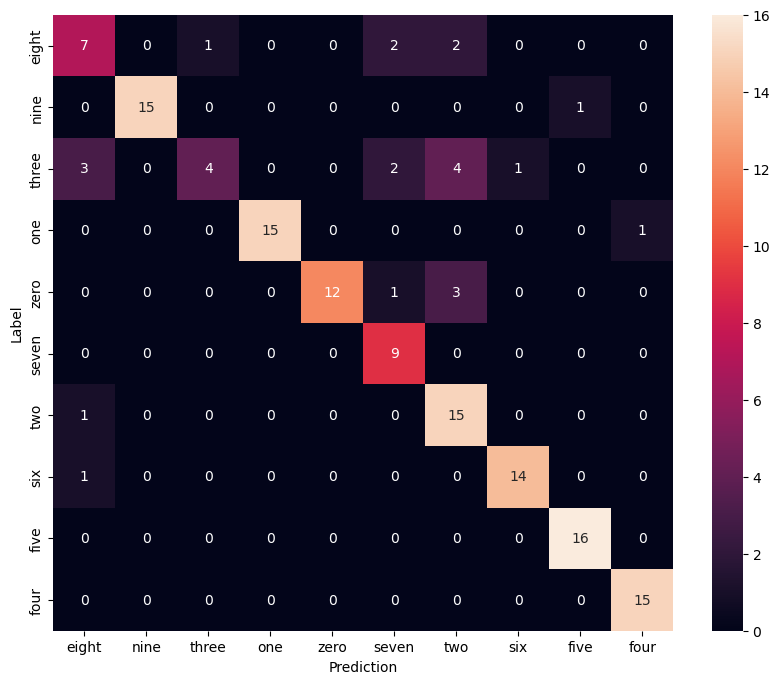

In [88]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [89]:
data_dir_test

PosixPath('data/dataset_test_4c_eng')

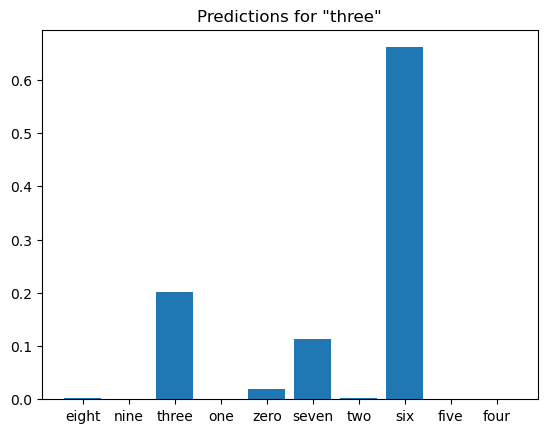

In [90]:
sample_file = data_dir_test/'three/3_eng1.wav'

sample_ds = preprocess_dataset([str(sample_file)])

for spectrogram, label in sample_ds.batch(1):
  prediction = model(spectrogram)
  plt.bar(commands, tf.nn.softmax(prediction[0]))
  plt.title(f'Predictions for "{commands[label[0]]}"')
  plt.show()

## Train data 2

In [91]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files_2)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

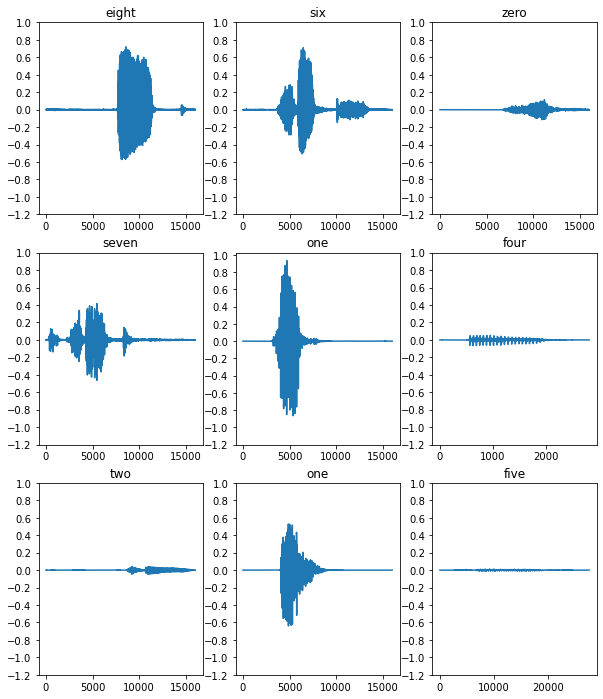

In [143]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

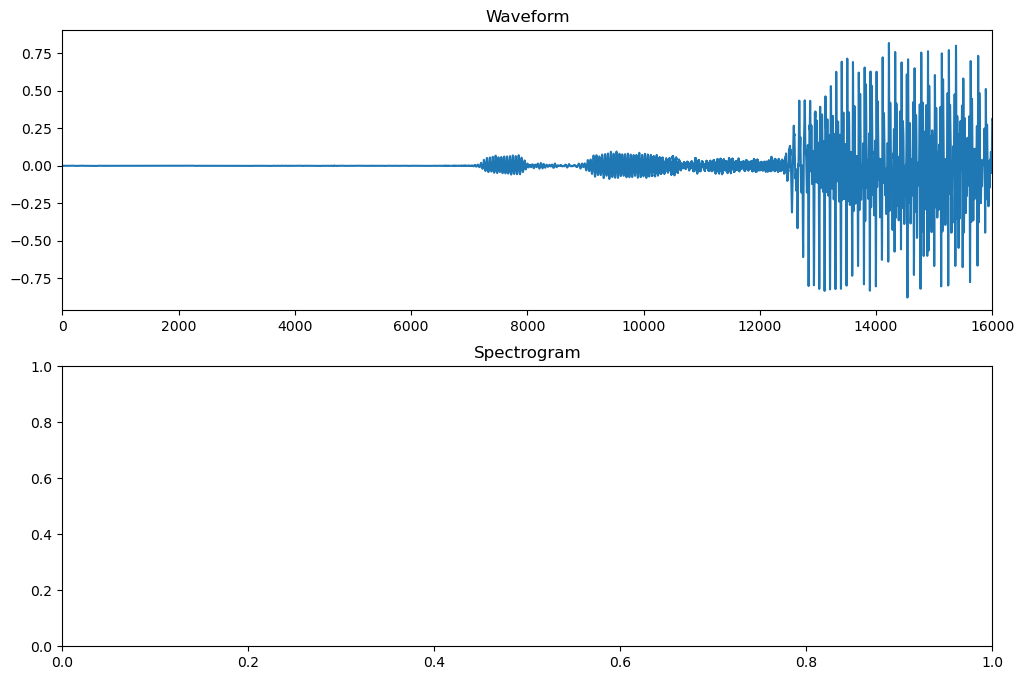

In [94]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

#plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [95]:
spectrogram_ds = waveform_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

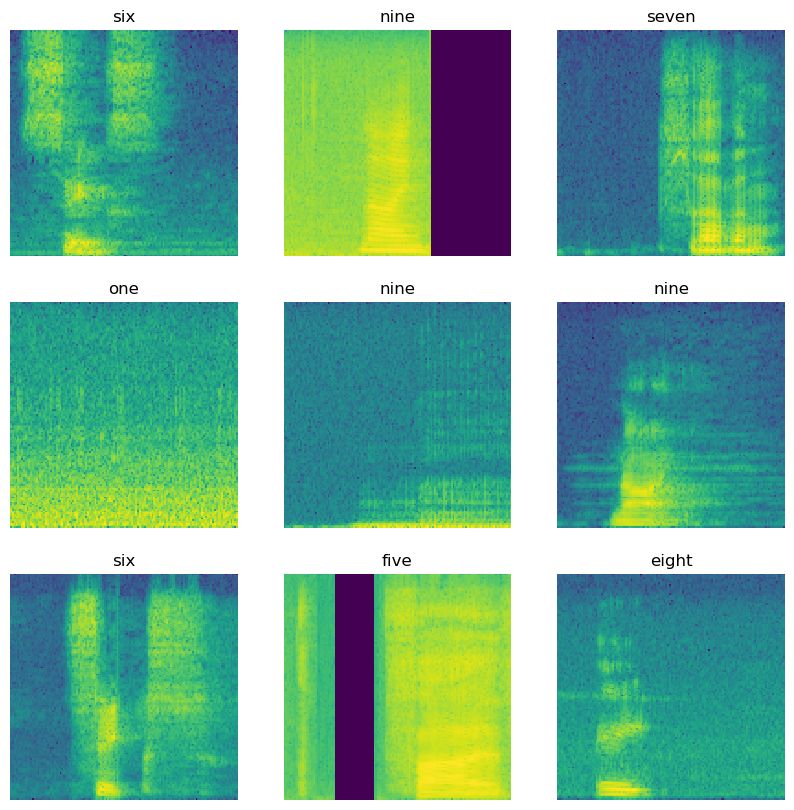

In [96]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(commands[label_id.numpy()])
  ax.axis('off')

plt.show()

In [97]:
train_ds = spectrogram_ds

In [98]:
batch_size = 64
train_ds = train_ds.batch(batch_size)

In [99]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)

In [ ]:
EPOCHS = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/100
733/733 [==============================] - 243s 330ms/step - loss: 1.1796 - accuracy: 0.6039 - val_loss: 1.0250 - val_accuracy: 0.6220
Epoch 2/100
733/733 [==============================] - 154s 210ms/step - loss: 0.6281 - accuracy: 0.7924 - val_loss: 0.4788 - val_accuracy: 0.8980
Epoch 3/100
733/733 [==============================] - 140s 190ms/step - loss: 0.4756 - accuracy: 0.8435 - val_loss: 0.3137 - val_accuracy: 0.9360
Epoch 4/100
733/733 [==============================] - 137s 187ms/step - loss: 0.3989 - accuracy: 0.8675 - val_loss: 0.2317 - val_accuracy: 0.9160
Epoch 5/100
733/733 [==============================] - 144s 197ms/step - loss: 0.3450 - accuracy: 0.8865 - val_loss: 0.1587 - val_accuracy: 0.9700
Epoch 6/100
733/733 [==============================] - 134s 183ms/step - loss: 0.3044 - accuracy: 0.8979 - val_loss: 0.1498 - val_accuracy: 0.9380
Epoch 7/100
733/733 [==============================] - 125s 170ms/step - loss: 0.2732 - accuracy: 0.9087 - val_loss: 0

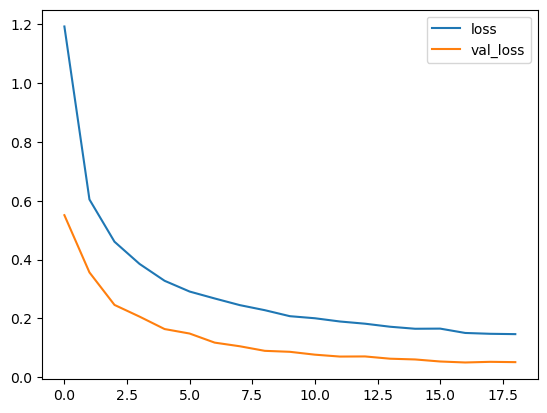

In [100]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [101]:
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [102]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

5/5 [==============================] - 0s 10ms/step
Test set accuracy: 84%


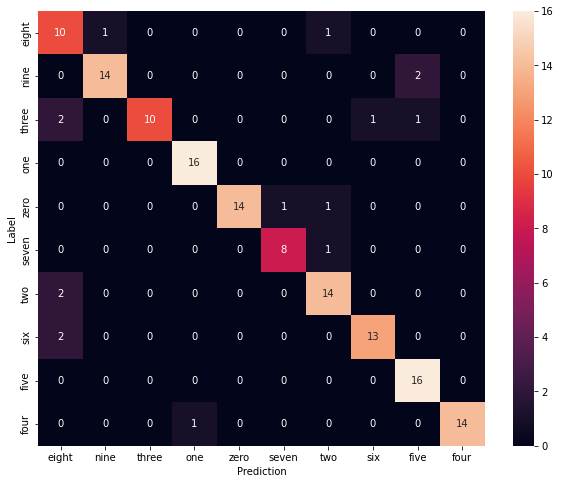

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [103]:
data_dir_test

PosixPath('data/dataset_test_4c_eng')

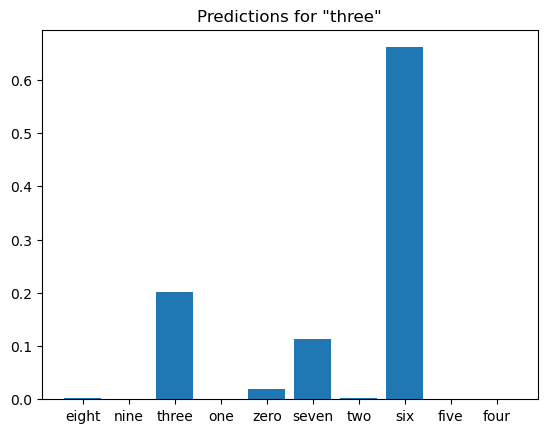

In [104]:
sample_file = data_dir_test/'three/3_eng1.wav'

sample_ds = preprocess_dataset([str(sample_file)])

for spectrogram, label in sample_ds.batch(1):
  prediction = model(spectrogram)
  plt.bar(commands, tf.nn.softmax(prediction[0]))
  plt.title(f'Predictions for "{commands[label[0]]}"')
  plt.show()